# Stroke Prediction

We will be working with the [Stroke Prediction Data Set from Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). 

### Context
According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, smoking status etc. 

Attribute Information
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
- stroke: 1 if the patient had a stroke or 0 if not

## Import Libraries
Let's import some libraries to get started!

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [101]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [102]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [103]:
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [104]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the above we can see that the 'bmi' column has missing values.

## Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data
We can use simple heatmap to see where we are missing data!

<AxesSubplot:>

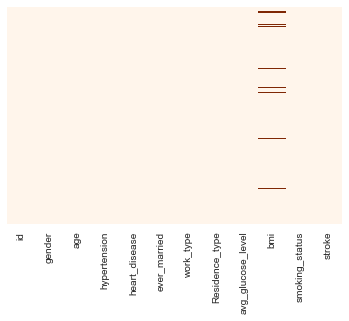

In [105]:
sns.heatmap(stroke_df.isnull(), yticklabels=False, cbar=False, cmap='Oranges')

A small number of bmi values are missing. The proportion of bmi values missing is small enough for reasonable replacement with some form of imputation.

Let's continue on by visualizing some more of the data.

<AxesSubplot:xlabel='stroke', ylabel='count'>

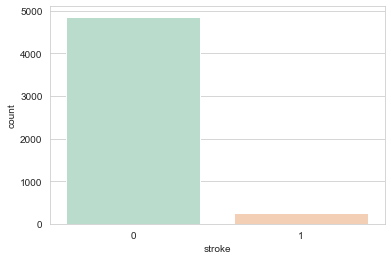

In [106]:
sns.set_style('whitegrid')
sns.countplot(x='stroke', data=stroke_df, palette='Pastel2')

<AxesSubplot:xlabel='stroke', ylabel='count'>

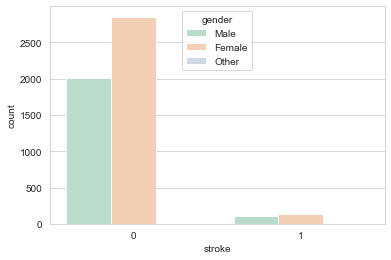

In [107]:
sns.countplot(x='stroke', data=stroke_df, hue='gender', palette='Pastel2')

<AxesSubplot:xlabel='gender', ylabel='count'>

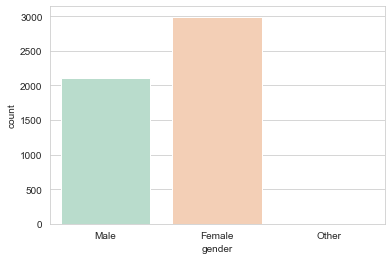

In [108]:
sns.countplot(x='gender', data=stroke_df, palette='Pastel2')

In [109]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

From the above plots we can observe that there is more data for the gender 'Female'.

<AxesSubplot:xlabel='age', ylabel='Count'>

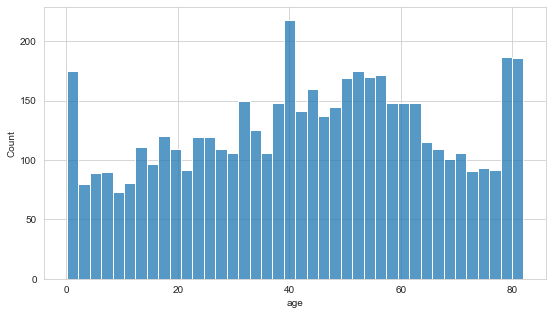

In [110]:
plt.figure(figsize=(9,5))
sns.histplot(data=stroke_df['age'], bins=40)

We can see from the above plot that there are about 200 rows of data where age is near 0.

<AxesSubplot:xlabel='stroke', ylabel='count'>

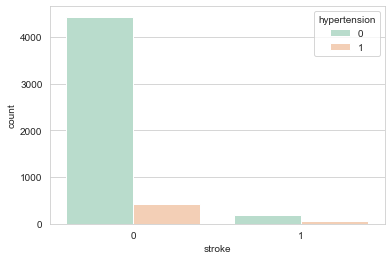

In [111]:
sns.countplot(x='stroke', data=stroke_df, hue='hypertension', palette='Pastel2')

<AxesSubplot:xlabel='stroke', ylabel='count'>

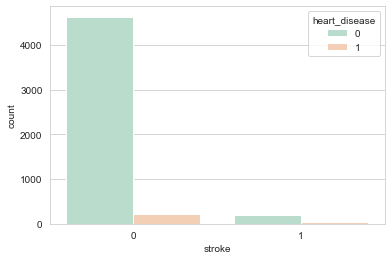

In [112]:
sns.countplot(x='stroke', data=stroke_df, hue='heart_disease', palette='Pastel2')